<a href="https://colab.research.google.com/github/ayushwattal/MarketBasket-Analysis/blob/main/MarketBasket_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis and Operations Performed
* Exploratory Data Analysis
*  K-Means Clustering
*  Elbow Method Plot
*  PCA Dimensionality Reduction
*  TSNE Dimensionality Reduction
*  K-Nearest Neighbour (KNN)
*  Confusion Matrix
*  Classification Report

In [1]:
# Import Python Libraries

import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
plt.rcParams['font.size']=14
%matplotlib inline

In [2]:
# Reading Dataset
df = pd.read_csv("./Mall_Customers.csv")

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Exploring ,Transforming and Visulaizing Dataset

In [4]:
df.shape

(200, 5)

In [5]:
df[['Age','Annual Income (k$)','Spending Score (1-100)']].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


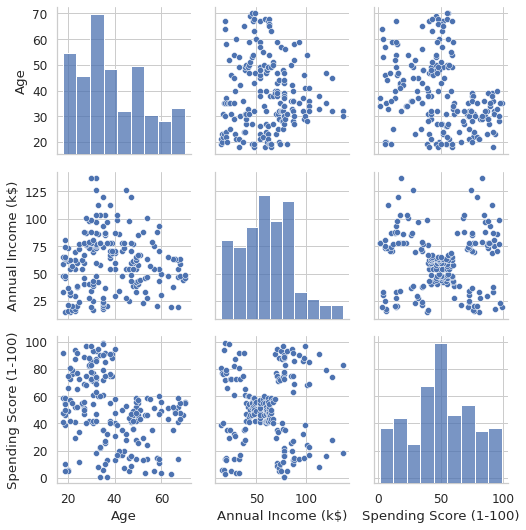

In [6]:
%matplotlib inline
import seaborn as sns

sns.set(font_scale=1.1)
sns.set_style('whitegrid')

grid = sns.pairplot(data=df, vars=df.columns[2:5])

After Exploring PairPlot it is seen that there are some cluster forming when we are scatter plotting 'Annual Income (k$)' with 'Spending Score (1-100)'.

It is visible that approximately 5 Clusters are present.

In [7]:
# There are no null values in the dataset so no need to clean.
# Transforming Age Column into dummy/indicator variables to make easy for computation.
df['Gender'] = pd.get_dummies(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


# Scaling Dataset

In [8]:
scaler = StandardScaler()
dataset_Scaled = scaler.fit_transform(df)

# Fit the data in to KMeans Model

In [9]:
km = KMeans(n_clusters=5, random_state=10)
y_predicted = km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
y_predicted

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [10]:
df['cluster']= y_predicted
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,0,19,15,39,3
1,2,0,21,15,81,0
2,3,1,20,16,6,3
3,4,1,23,16,77,0
4,5,1,31,17,40,3
...,...,...,...,...,...,...
195,196,1,35,120,79,2
196,197,1,45,126,28,4
197,198,0,32,126,74,2
198,199,0,32,137,18,4


Now we have labelled or dataset on the basis of cluster.

In [11]:
# Centroid Coordinate For Clusters

km.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

Text(0, 0.5, 'Annual Income (k$)')

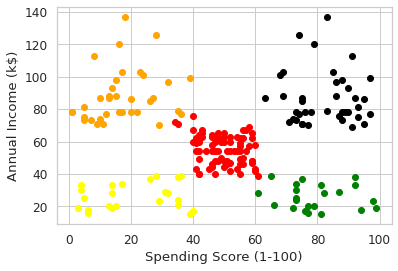

In [12]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]

plt.scatter(df1['Spending Score (1-100)'],df1['Annual Income (k$)'],color='green')
plt.scatter(df2['Spending Score (1-100)'],df2['Annual Income (k$)'],color='red')
plt.scatter(df3['Spending Score (1-100)'],df3['Annual Income (k$)'],color='black')
plt.scatter(df4['Spending Score (1-100)'],df4['Annual Income (k$)'],color='yellow')
plt.scatter(df5['Spending Score (1-100)'],df5['Annual Income (k$)'],color='orange')

plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')


### Calculating Elbow Plot -  Further Experimenting with the data

In [13]:
sse = []
k_rng = range(1,20)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Spending Score (1-100)','Annual Income (k$)']])
    sse.append(km.inertia_)

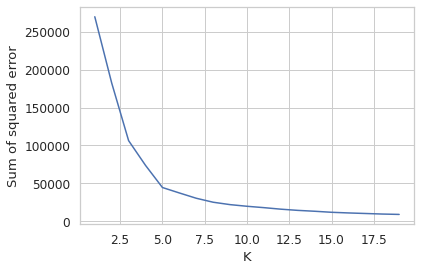

In [14]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

According to Elbow Rule For K Clustering optimal cluster numbers is 5 and we have taken that only.

## Dimensionality reduction with Principal Component Analysis (PCA)

In [15]:
from sklearn.decomposition import PCA

# Reduce to two components

reduced_data_pca = PCA(n_components=2, random_state=10).fit_transform(dataset_Scaled)

In [16]:
reduced_data_pca.shape

(200, 2)

In [17]:
reduced_data_pca[1:5]

array([[-2.27239142, -1.47410364],
       [-2.45422326, -0.00692224],
       [-2.38646142, -1.74993499],
       [-2.39737671, -0.36934116]])

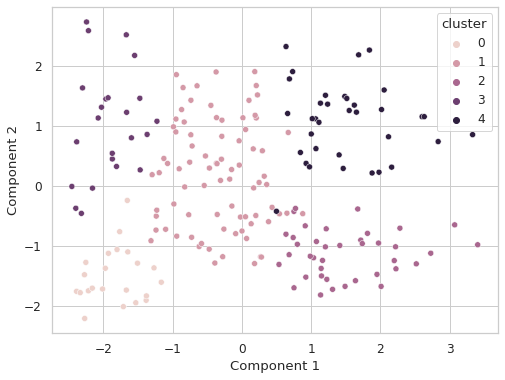

In [18]:
# Visulaising Reduced Data

reduced_df = pd.DataFrame(reduced_data_pca,columns=['Component 1', 'Component 2'])
reduced_df['cluster'] = df.cluster
plt.figure(figsize=(8,6))
axes = sns.scatterplot(data=reduced_df, hue='cluster', legend='brief', 
                       x='Component 1', y='Component 2')

The clusters or not well defined and merge with one another

## Dimensionality reduction with TSNE

In [19]:
from sklearn.manifold import TSNE

# Reduce to two components 

reduced_data_tsne = TSNE(n_components=2, random_state=10).fit_transform(dataset_Scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [20]:
reduced_data_tsne.shape

(200, 2)

In [21]:
reduced_data_tsne[1:5]

array([[-13.146935 ,  -0.8280059],
       [  9.28778  ,   8.794616 ],
       [  4.57455  ,   9.563203 ],
       [  8.159551 ,   7.997526 ]], dtype=float32)

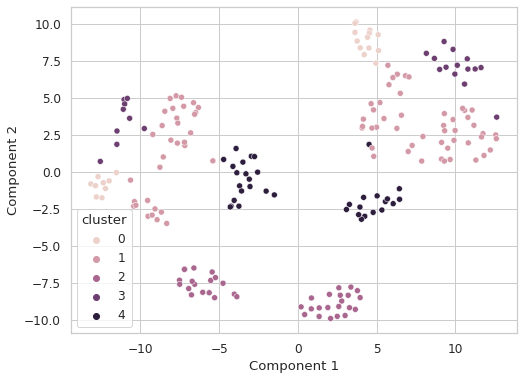

In [22]:
# Visulaising Reduced Data

reduced_df = pd.DataFrame(reduced_data_tsne,columns=['Component 1', 'Component 2'])
reduced_df['cluster'] = df.cluster
plt.figure(figsize=(8,6))
axes = sns.scatterplot(data=reduced_df, hue='cluster', legend='brief', 
                       x='Component 1', y='Component 2')

# Supervised Learning for Labelled Dataset

In [23]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,0,19,15,39,3
1,2,0,21,15,81,0
2,3,1,20,16,6,3
3,4,1,23,16,77,0
4,5,1,31,17,40,3
...,...,...,...,...,...,...
195,196,1,35,120,79,2
196,197,1,45,126,28,4
197,198,0,32,126,74,2
198,199,0,32,137,18,4


In [24]:
df.shape

(200, 6)

In [25]:
# Target Column is 'cluster'
# Here, x is independent variable and y is dependent variable

x = df.drop(['cluster'], axis=1).values
y = df['cluster'].values

In [26]:
#Shape of Sample and Target Set

print(f'Shape of Sample Set = {x.shape}')
print(f'Shape of Target Set = {y.shape}')

Shape of Sample Set = (200, 5)
Shape of Target Set = (200,)


###  Split the data for training and testing

In [27]:
# Split the data for training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(x,y,test_size=0.3, random_state=10)


### Explore the data and target values

In [28]:
# Shapes of the training and testing data

print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape  = {X_test.shape}')

print()
print(f'y_train.shape = {y_train.shape}')
print(f'y_test.shape  = {y_test.shape}')

X_train.shape = (140, 5)
X_test.shape  = (60, 5)

y_train.shape = (140,)
y_test.shape  = (60,)


### Create and train the k-nearest neighbors model

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [30]:
# Test the model by predicting cluster

predicted = knn.predict(X=X_test)
expected = y_test

print('First twenty predictions:')
print(f'predicted[:20] = {predicted[:20]}')
print(f' expected[:20] = {expected[:20]}')

First twenty predictions:
predicted[:20] = [1 0 3 4 1 0 4 1 1 3 1 3 1 4 1 1 1 1 1 2]
 expected[:20] = [1 0 3 4 1 0 4 1 1 3 1 3 1 1 4 1 1 1 1 2]


In [31]:
wrong = [ (pred, exp) 
          for (pred, exp) in zip(predicted, expected) 
          if pred != exp
        ]

print('Wrong predictions:')
print(wrong)

Wrong predictions:
[(4, 1), (1, 4), (0, 1)]


In [32]:
# Model prediction accuracy

print(f'Prediction accuracy score = {knn.score(X_test, y_test):.2%}')

Prediction accuracy score = 95.00%


### Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=expected, y_pred=predicted)

print('Confusion matrix:')
print(confusion)

Confusion matrix:
[[ 7  0  0  0  0]
 [ 1 28  0  0  1]
 [ 0  0  7  0  0]
 [ 0  0  0  5  0]
 [ 0  1  0  0 10]]


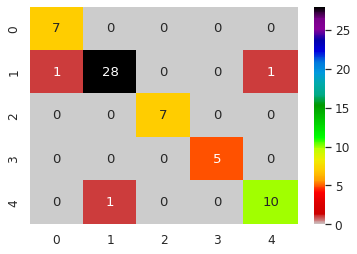

In [34]:
import pandas as pd
import seaborn as sns

confusion_df = pd.DataFrame(confusion, index=range(5), columns=range(5))
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

### Classification Report

In [36]:
from sklearn.metrics import classification_report

names = [0,1,2,3,4]
print(classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.97      0.93      0.95        30
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         5
           4       0.91      0.91      0.91        11

    accuracy                           0.95        60
   macro avg       0.95      0.97      0.96        60
weighted avg       0.95      0.95      0.95        60

